In [ ]:
# This program classifies 3D models from 2D pictures into 3 categories.

In [ ]:
# Setup the data.
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

# Load the Google Drive Helper and Mount 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6Azk_pTNtz6llRrfo5NIHDKlPuQRhLB53WQXyo4a7IL2OqLUjPARg
Mounted at /content/drive


In [ ]:
# List all of the files available
# clean_array_files = !ls "/content/drive/MyDrive/Data for AI in CPS Project/data/clean"
# clean_array_files = os.listdir( "/content/drive/MyDrive/data for AI in CPS Project/data/clean")
# stringing_array_files = os.listdir("/content/drive/MyDrive/data for AI in CPS Project/data/stringing")
# unsuccessful_array_files = os.listdir("/content/drive/MyDrive/data for AI in CPS Project/data/unsuccessful")

clean_array_files = os.listdir( "/content/drive/MyDrive/data/clean")
stringing_array_files = os.listdir("/content/drive/MyDrive/data/stringing")
unsuccessful_array_files = os.listdir("/content/drive/MyDrive/data/unsuccessful")


File_006.jpeg
['File_006.jpeg', 'File_003.jpeg', 'File_000.jpeg', 'File_004.jpeg', 'File_002.jpeg', 'File_005.jpeg', 'File_008.jpeg', 'File_007.jpeg', 'File_001.jpeg', 'File_009.jpeg', 'File_010.jpeg', 'File_012.jpeg', 'File_013.jpeg', 'File_011.jpeg', 'File_014.jpeg', 'File_017.jpeg', 'File_018.jpeg', 'File_020.jpeg', 'File_015.jpeg', 'File_016.jpeg', 'File_019.jpeg', 'File_021.jpeg', 'File_023.jpeg', 'File_022.jpeg']


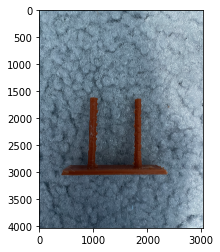

In [ ]:
# img_array = cv2.imread('/content/drive/My Drive/Data for AI in CPS Project/data/clean/'+clean_array_files[0], cv2.IMREAD_COLOR)
img_array = cv2.imread('/content/drive/My Drive/data/clean/'+clean_array_files[0], cv2.IMREAD_COLOR)
plt.imshow(img_array)
print(clean_array_files[0])
print(clean_array_files)

In [ ]:
## ignore FOR NOW 
file_list = []
class_list = []

# List all of the files available
clean_array_files = os.listdir( "/content/drive/MyDrive/Data for AI in CPS Project/data/clean")
stringing_array_files = os.listdir("/content/drive/MyDrive/Data for AI in CPS Project/data/stringing")
unsuccessful_array_files = os.listdir("/content/drive/MyDrive/Data for AI in CPS Project/data/unsuccessful")
files_combined = [clean_array_files, stringing_array_files, unsuccessful_array_files]

# All the categories in the neural network
CATEGORIES = ["clean", "stringing", "unsuccessful"]

# The size of the images
IMG_SIZE = 50

training_data = []

# Make training data

def create_training_data(): 
  for category in CATEGORIES:
      class_num = CATEGORIES.index(category)
      for i in range(len(files_combined[class_num])) :
        try :
          img_array = cv2.imread('/content/drive/My Drive/Data for AI in CPS Project/data/'+category+'/'+files_combined[class_num][i], cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])
        except Exception as e:
          pass

create_training_data()

In [ ]:
index = 40 
print(training_data[index])
plt.imshow(training_data[index][0])

NameError: ignored

In [ ]:


# IGNORE FOR NOW 
# random.shuffle(training_data)

X = [] #features
y = [] #labels
y = np.array(y)

for features, label in training_data:
  X.append(features)
  np.array((y,label))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)


In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

batch_size = 8
# # Opening the files about data
# X = pickle.load(open("X.pickle", "rb"))
# y = pickle.load(open("y.pickle", "rb"))

# # normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

# specify augmentation - zoom, flip, shift, etc. - here.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255, 
    zoom_range = 0.2,
    horizontal_flip=True,
    validation_split=0.2 # validation split is set here.
)
# data generator objects for training. Shuffling, labels - default true.
train_generator = image_generator.flow_from_directory(
    '/content/drive/MyDrive/data/',
    class_mode="sparse", # for sparse categorical crossentropy.
    color_mode="rgb", # you can convert to gray-scale if you would like.
    batch_size=batch_size, # you get to choose
    target_size=(250, 250), # resize automatically.
    subset='training'
)

# The only difference from above is the subset.
validation_generator = image_generator.flow_from_directory(
    '/content/drive/MyDrive/data/',
    class_mode="sparse", # for sparse categorical crossentropy.
    color_mode="rgb", # you can convert to gray-scale if you would like.
    batch_size=batch_size, # you get to choose
    target_size=(250, 250), # resize automatically.
    subset='validation'
)

# Alex - 

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 3 neurons, for 3 classes
model.add(Dense(3))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images
# used for the validation phase compared to all the images
# history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)
batch_size, epochs = batch_size, 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=epochs,
    # validation split and shuffling is included.
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 66 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 1.4576 - accuracy: 0.3363 - val_loss: 1.1225 - val_accuracy: 0.2500
Epoch 2/100
8/8 [==============================] - 14s 2s/step - loss: 1.0905 - accuracy: 0.3187 - val_loss: 1.3209 - val_accuracy: 0.2500
Epoch 3/100
8/8 [==============================] - 14s 2s/step - loss: 0.9447 - accuracy: 0.4789 - val_loss: 1.2727 - val_accuracy: 0.6250
Epoch 4/100
8/8 [==============================] - 14s 2s/step - loss: 0.7207 - accuracy: 0.8188 - val_loss: 0.8562 - val_accuracy: 0.3750
Epoch 5/100
8/8 [==============================] - 14s 2s/step - loss: 0.7051 - accuracy: 0.6941 - val_loss: 0.9167 - val_accuracy: 0.5000
Epoch 6/100
8/8 [==============================] - 14s 2s/step - loss: 0.5606 - accuracy: 0.8563

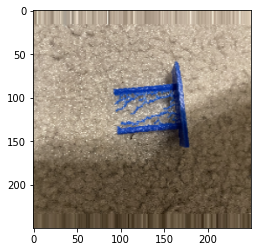

In [ ]:
x= next(train_generator)
# print(x)
plt.imshow(tf.squeeze(x[0][5]))


In [ ]:


test_generator = image_generator.flow_from_directory(
        '/content/drive/MyDrive/testData/',
        target_size=(250, 250),
        color_mode="rgb",
        shuffle = False,
        class_mode='sparse',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict(test_generator,steps = nb_samples)
print(predict)
predict = model.predict_classes(test_generator)
print(predict)

Found 3 images belonging to 1 classes.
[[2.6565813e-14 6.4069629e-01 3.5930377e-01]
 [5.0902013e-13 9.9999523e-01 4.7796902e-06]
 [8.0003799e-12 9.9997008e-01 2.9895255e-05]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1 1 1]


In [ ]:
# # Saving the model
# model_json = model.to_json()
# with open("model.json", "w") as json_file :
# 	json_file.write(model_json)

# model.save_weights("model.h5")
# print("Saved model to disk")

# model.save('CNN.model')

# # Printing a graph showing the accuracy changes during the training phase
# print(history.history.keys())
# plt.figure(1)
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# # Alex Note: plotting loss is more important that accuracy.

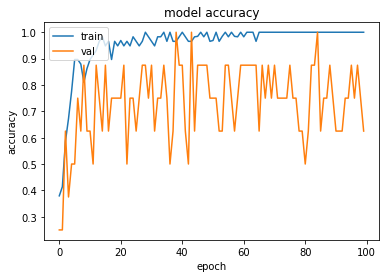

In [ ]:
# Plotting accuracy for yourself.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

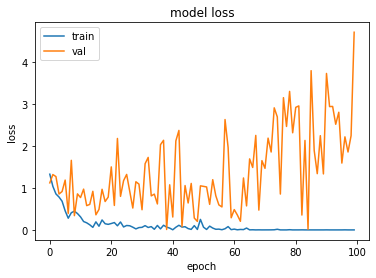

In [ ]:
# Plotting loss is more important.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()